# Importing Dependencies

In [11]:
import pandas as pd
import numpy as np
import os
import keras.applications
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Defining Directories for Face Mask Data

In [12]:
data_dir = "data"
with_mask_dir = os.path.join(data_dir, "with_mask")
without_mask_dir = os.path.join(data_dir, "without_mask")

# Display with mask image

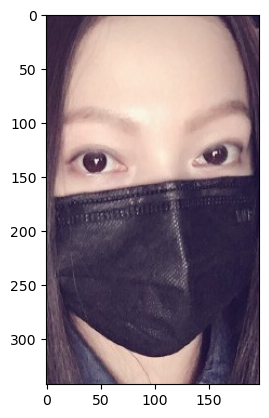

In [13]:
img = mpimg.imread('C:/Users/USER/Face_Mask_Detection/data/with_mask/with_mask_22.jpg')
imgplot = plt.imshow(img)
plt.show()

# Display without mask image

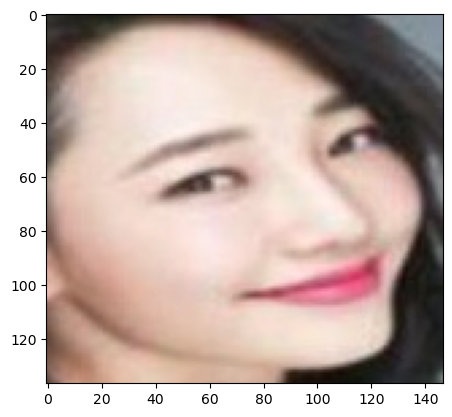

In [14]:
img = mpimg.imread('C:/Users/USER/Face_Mask_Detection/data/without_mask/without_mask_246.jpg')
imgplot = plt.imshow(img)
plt.show()

# Create a list to store image file paths and corresponding labels

In [15]:
data = []
labels = []

# Load images from the 'with_mask' folder and set the label to 1

In [16]:
for img in os.listdir(with_mask_dir):
    img_path = os.path.join(with_mask_dir, img)
    data.append(img_path)
    labels.append(1)

# Load images from the 'without_mask' folder and set the label to 0

In [17]:
for img in os.listdir(without_mask_dir):
    img_path = os.path.join(without_mask_dir, img)
    data.append(img_path)
    labels.append(0)

# Convert the lists to NumPy arrays

In [18]:
data = np.array(data)
labels = np.array(labels)

# Function to preprocess the images

In [19]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(64, 64))
    img = img_to_array(img)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img

# Preprocess all images and store them in 'X' (input) and 'y' (target) variables

In [20]:
X = np.array([preprocess_image(img_path) for img_path in data])
y = labels

In [21]:
# Shuffle the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

# Split the data into training and testing sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a Convolutional Neural Network (CNN)

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Model Compilation and Training

In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/10
378/378 [==============================] - 27s 68ms/step - loss: 0.3517 - accuracy: 0.8494 - val_loss: 0.2299 - val_accuracy: 0.9107
Epoch 2/10
378/378 [==============================] - 34s 91ms/step - loss: 0.2462 - accuracy: 0.9027 - val_loss: 0.1994 - val_accuracy: 0.9199
Epoch 3/10
378/378 [==============================] - 32s 85ms/step - loss: 0.1958 - accuracy: 0.9225 - val_loss: 0.1683 - val_accuracy: 0.9318
Epoch 4/10
378/378 [==============================] - 27s 72ms/step - loss: 0.1588 - accuracy: 0.9441 - val_loss: 0.1509 - val_accuracy: 0.9404
Epoch 5/10
378/378 [==============================] - 28s 74ms/step - loss: 0.1302 - accuracy: 0.9505 - val_loss: 0.1580 - val_accuracy: 0.9444
Epoch 6/10
378/378 [==============================] - 30s 79ms/step - loss: 0.0976 - accuracy: 0.9651 - val_loss: 0.1561 - val_accuracy: 0.9504
Epoch 7/10
378/378 [==============================] - 29s 77ms/step - loss: 0.0768 - accuracy: 0.9720 - val_loss: 0.1628 - val_accuracy:

# Model Evaluation

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

48/48 [==============================] - 1s 23ms/step - loss: 0.2081 - accuracy: 0.9523
Test Loss: 0.2080811709165573
Test Accuracy: 0.9523494243621826


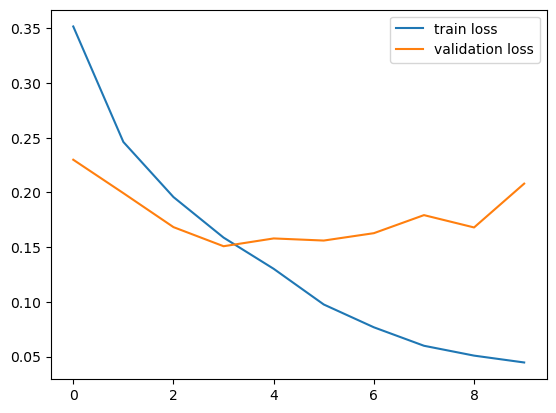

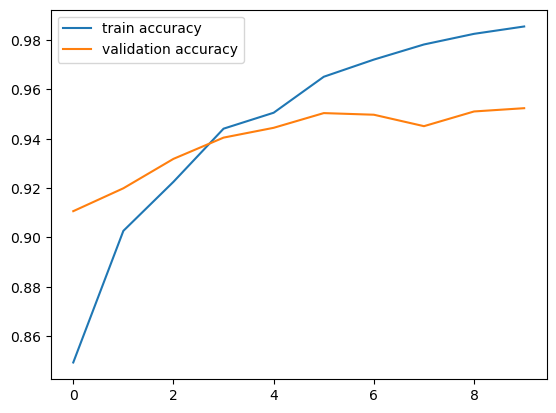

In [28]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

# Visualizing Convolutional Neural Network Filters

conv2d_2 (3, 3, 3, 32)
32


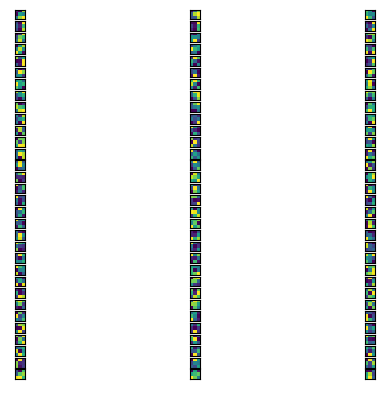

conv2d_3 (3, 3, 32, 64)
64


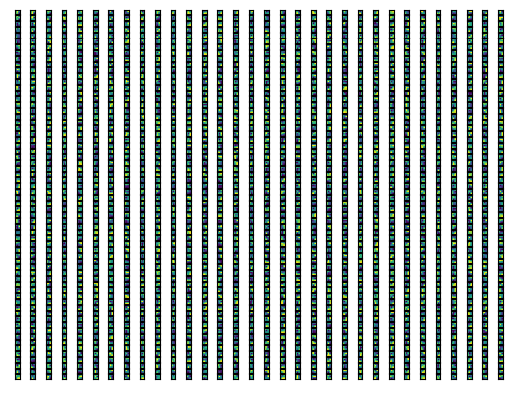

In [29]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()
        print(layer.name, weights.shape)
        # Normalize filter values between 0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)
        print(filters.shape[3])
        filter_cnt = 1
        # Plotting all the filters
        for i in range(filters.shape[3]):
            # Get the filters
            filt = filters[:, :, :, i]
            # Plotting each of the channels, color image RGB channels
            for j in range(filters.shape[2]):
                ax = plt.subplot(filters.shape[3], filters.shape[2], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, :, j])
                filter_cnt += 1
        plt.show()

# Building Predictive Function

In [30]:
def predict_mask(image_path):
    img = preprocess_image(image_path)
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    accuracy = round(prediction[0][0] * 100, 2)
    if prediction[0][0] >= 0.5:
        return "The image below is with mask (Accuracy: {}%)".format(accuracy)
    else:
        return "The image below is without mask (Accuracy: {}%)".format(accuracy)

# Testing the Model

1/1 [==============================] - 0s 24ms/step
The image below is without mask (Accuracy: 0.0%)


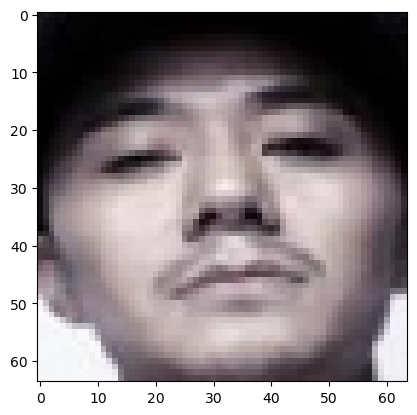

In [37]:
image_path = "C:/Users/USER/Face_Mask_Detection/data/without_mask/without_mask_6.jpg"
prediction = predict_mask(image_path)
img = preprocess_image(image_path)
img = np.float32(img)
plt.imshow(img)
print(prediction)

1/1 [==============================] - 0s 32ms/step
The image below is without mask (Accuracy: 0.0%)


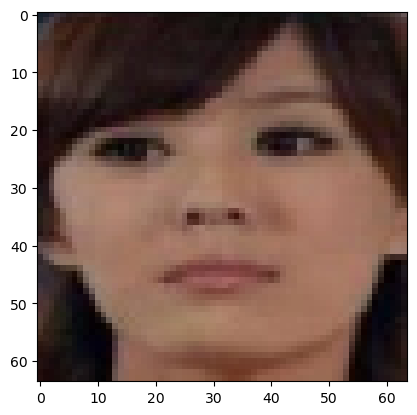

In [32]:
image_path = "C:/Users/USER/Face_Mask_Detection/data/without_mask/without_mask_386.jpg"
prediction = predict_mask(image_path)
img = preprocess_image(image_path)
img = np.float32(img)
plt.imshow(img)
print(prediction)

1/1 [==============================] - 0s 33ms/step
The image below is with mask (Accuracy: 92.04%)


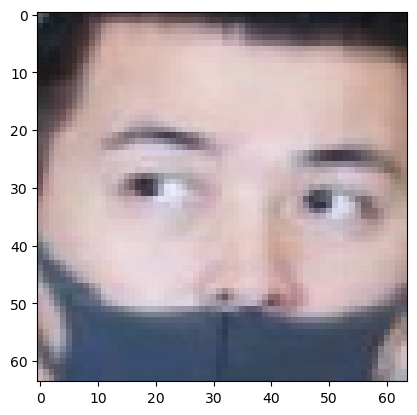

In [33]:
image_path = "C:/Users/USER/Face_Mask_Detection/data/with_mask/with_mask_27.jpg"
prediction = predict_mask(image_path)
img = preprocess_image(image_path)
img = np.float32(img)
plt.imshow(img)
print(prediction)

1/1 [==============================] - 0s 25ms/step
The image below is with mask (Accuracy: 85.76%)


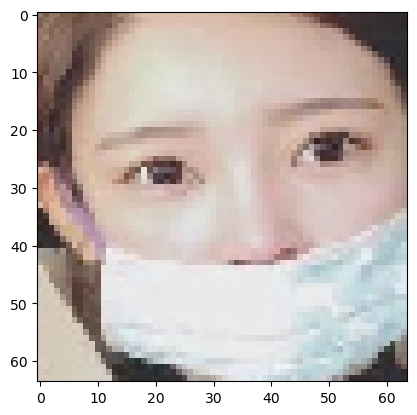

In [34]:
image_path = "C:/Users/USER/Face_Mask_Detection/data/with_mask/with_mask_170.jpg"
prediction = predict_mask(image_path)
img = preprocess_image(image_path)
img = np.float32(img)
plt.imshow(img)
print(prediction)

In [38]:
model.save('model.h5')